In [111]:
import pandas as pd
import numpy as np
%pylab inline
pd.set_option('precision',10)


Populating the interactive namespace from numpy and matplotlib


In [112]:
def p_maxes(path):
    df = pd.read_pickle(path)
    df = df.drop_duplicates()
    df = df.drop_duplicates(('gamma','alpha','fit_intercept'))
    print '{} Parameters Fit'.format(len(df))
    print '{}% Maximum Accuracy'.format(np.round(df.sort('results_mean',ascending=False).iloc[0].results_mean,4) * 100)
    return df, df.sort('results_mean',ascending=False)[df.results_mean == max(df.results_mean)].sort('n_features')

def imshow_data(data_frame):
    alp = np.unique(data_frame.alpha)
    gam = np.unique(data_frame.gamma)
    scores = []
    for a in alp:
        d = data_frame[data_frame.alpha == a]
        for g in gam:
            try:
                scores.append(np.float(d[d.gamma == g]['results_mean']))
            except:
                scores.append(0)
    scores = np.array(scores)
    scores = np.array(scores.reshape((len(alp),len(gam))))
    cax = plt.imshow(scores, interpolation="nearest", cmap=plt.cm.bone)
    plt.xticks(np.arange(len(gam)), gam, rotation=45)
    plt.xlabel('$\gamma$')
    plt.yticks(np.arange(len(alp)), alp)
    plt.ylabel('Alpha')
    plt.title('Validation accuracy')
    cbar = plt.colorbar(cax, ticks=[np.min(scores), np.mean(scores), np.max(scores)])
    print 'Max Performance : {}'.format((np.round(np.max(scores),5)))
    return alp, gam

#$$D_{Mean}$$

In [113]:
df,m = p_maxes('dmean_Elastic_NET')
m

1 Parameters Fit
0.0% Maximum Accuracy


,results_mean,alpha,l1_ratio,C,gamma,Normalize,fit_intercept,n_features
1,0,3.039195382e-10,1,1,100000,False,True,26427


ValueError: math domain error

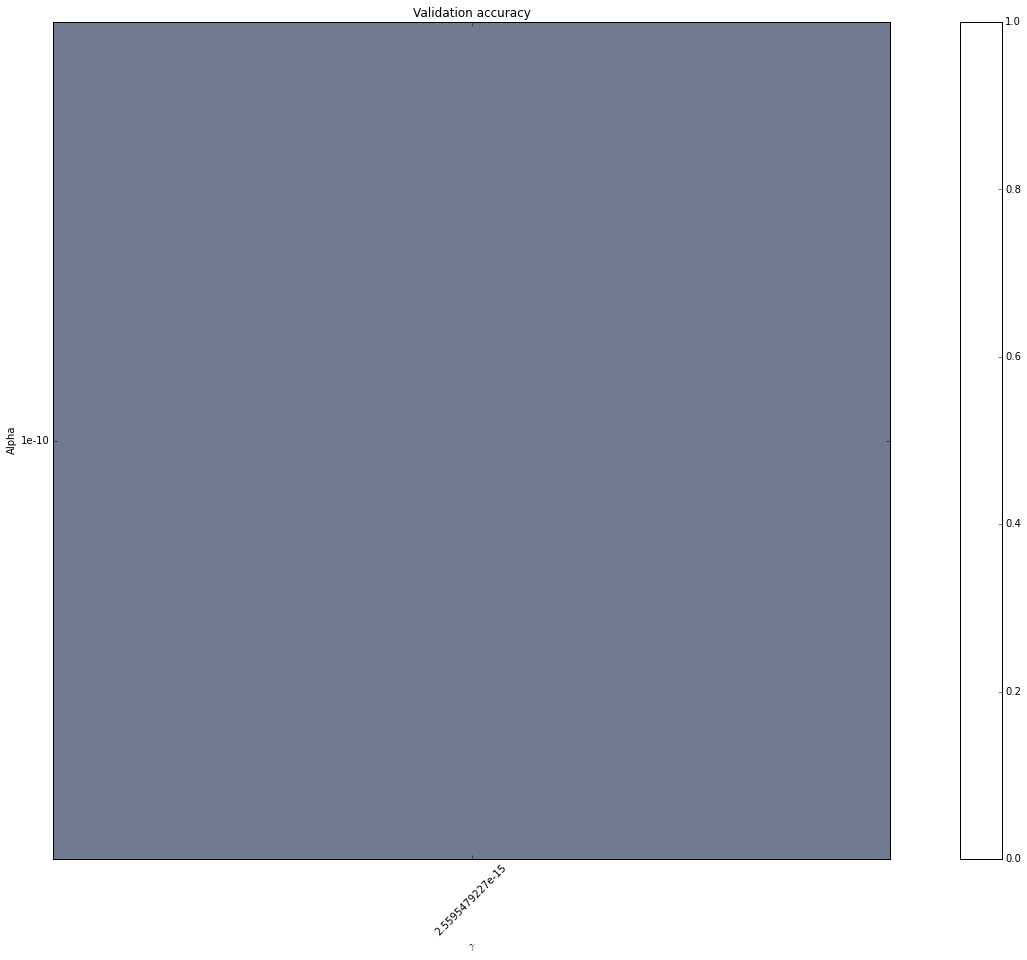

In [99]:
data_fit = df[df.n_features != 0]
 
plt.figure(figsize=(25,15))

alphas_fit,gammas_fit = imshow_data(data_fit)

plt.show()


np.save("gammas_dmean_fit",gammas_fit)
np.save("alphas_dmean_fit",alphas_fit)

In [82]:
# data_fit.drop_duplicates('n_features').sort('n_features')

#$$K_{Mean}$$

In [97]:
df,m = p_maxes('kmean_Elastic_NET')
m

df=df[df.alpha != 1e-7]
m

1 Parameters Fit
0.0% Maximum Accuracy


,results_mean,alpha,l1_ratio,C,gamma,Normalize,fit_intercept,n_features
1,0,1.000000000e-10,1,1,2.559547923e-15,False,True,19973


Max Performance : 0.79412


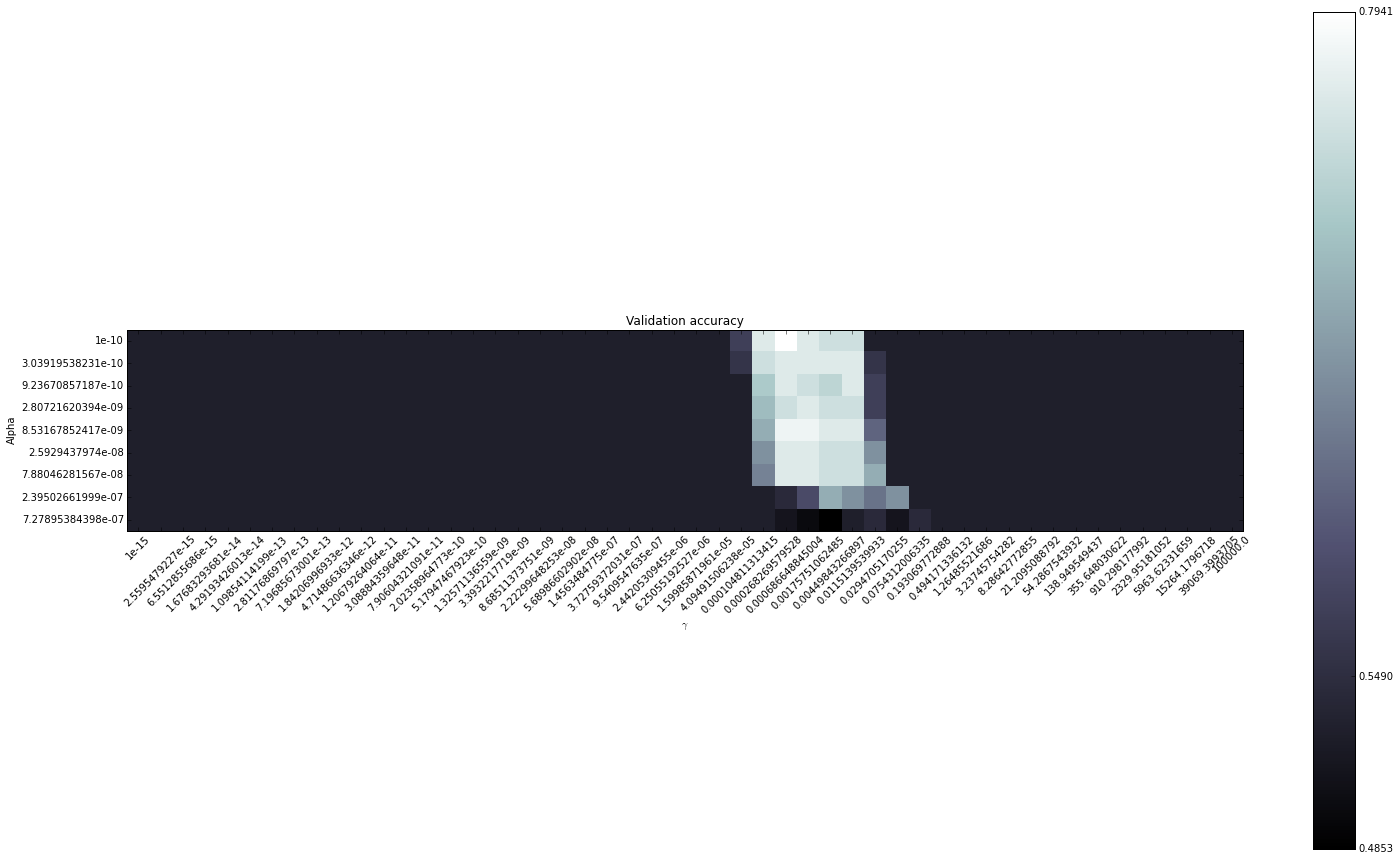

In [89]:
data_fit = df[df.n_features != 0]
 
plt.figure(figsize=(25,15))

alphas_fit,gammas_fit = imshow_data(data_fit)

plt.show()


np.save("gammas_fa_fit",gammas_fit)
np.save("alphas_fa_fit",alphas_fit)

In [87]:
# data_fit.drop_duplicates('n_features').sort('n_features')

# $$F_{a}$$

In [12]:
df,m = p_maxes('fa_Elastic_NET')
m



1 Parameters Fit
57.35% Maximum Accuracy


,results_mean,alpha,l1_ratio,C,gamma,Normalize,fit_intercept,n_features
1,0.573529412,0.0000001,1,1,0.1,False,True,2383


Max Performance : 0.72059
Max Performance : 0.75


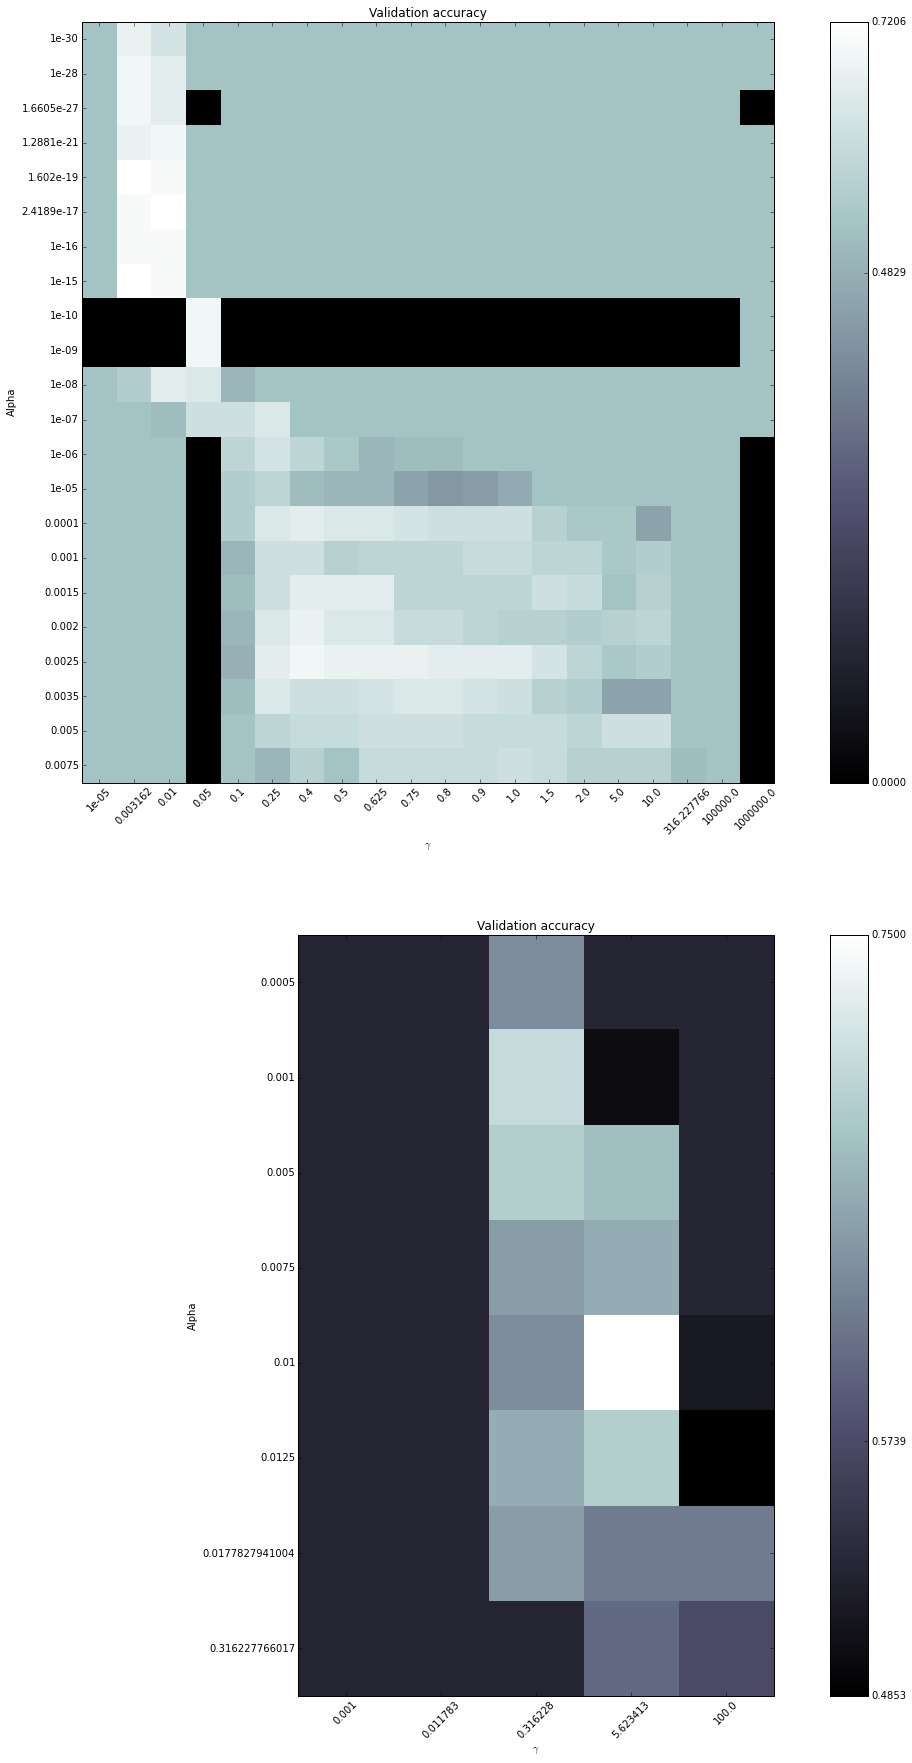

In [297]:
data_fit = df[df.n_features != 0]
 
plt.figure(figsize=(25,15))

alphas_fit,gammas_fit = imshow_data(data_fit)

plt.show()


np.save("gammas_fa_fit",gammas_fit)
np.save("alphas_fa_fit",alphas_fit)